In [1]:
import numpy as np
import h5py
import os, shutil
import sys
import cv2
from PIL import Image
sys.path.insert(0, './lib/')
from extract_patches import *
# pre_processing.py
from pre_processing import *
from help_functions import *

In [2]:
def extract_random(full_imgs,full_masks, img_size,patch_h,patch_w, num_patches):
    if (num_patches % full_imgs.shape[0] != 0): #나머지가 0이 아니어야 한다.
        print ("[extract random] num_patches: please enter a multiple of 20")
        exit()
    #why..?
    assert (len(full_imgs.shape)==4 and len(full_masks.shape)==4)  #4D arrays (Tensor)
    assert (full_imgs.shape[1]==1 or full_imgs.shape[1]==3)  #check the channel is 1 or 3
    assert (full_masks.shape[1]==1)   #masks only black and white
    assert (full_imgs.shape[2] == full_masks.shape[2] and full_imgs.shape[3] == full_masks.shape[3]) #두 data의 사이즈는 같아야 한다.
    
    patches = np.empty((num_patches,full_imgs.shape[1], patch_h, patch_w))
    patches_masks = np.empty((num_patches, full_masks.shape[1], patch_h, patch_w))
    
    print('[extract random] patches shape : {}'.format(patches.shape))
    
    img_h = full_imgs.shape[2]
    img_w = full_imgs.shape[3]
    
    patch_per_img =int(num_patches / full_imgs.shape[0]) #ex, 48 / 20
    print('[extract random] patches per full image : {}'.format(patch_per_img))
    iter_total =0 #iter over the total number of patches (num_patches)
    
    for i in range(full_imgs.shape[0]):  # loop, number of image samples
        k =0
        
        while k<patch_per_img: #iter, number of patch per img
            x_center = random.randint(0+int(patch_w/2) , img_w-int(patch_w/2))
            #print('[extract random] x_center : {}'.format(x_center))
            y_center = random.randint(0+int(patch_w/2) , img_w-int(patch_w/2))
                    
            patch = full_imgs[i,:,y_center-int(patch_h/2):y_center+int(patch_h/2),x_center-int(patch_w/2):x_center+int(patch_w/2)] #cropping
            patch_mask = full_masks[i,:,y_center-int(patch_h/2):y_center+int(patch_h/2),x_center-int(patch_w/2):x_center+int(patch_w/2)]
            patches[iter_total]=patch
            patches_masks[iter_total]=patch_mask
            iter_total +=1   #total
            k+=1  #per full_img
            
    return patches, patchezs_masks

## Ground truth preprocessing

Enter 1 to select 21_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


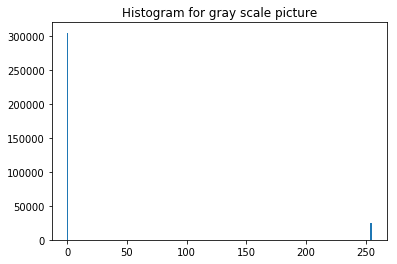

Enter 2 to select 22_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


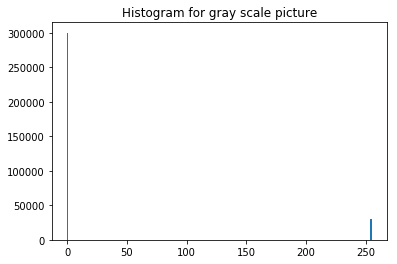

Enter 3 to select 23_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


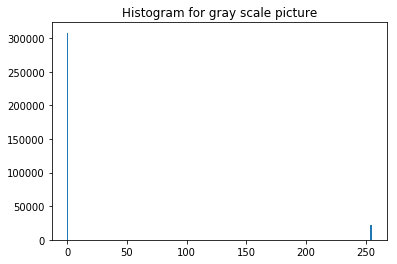

Enter 4 to select 24_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


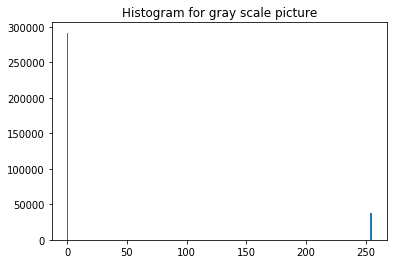

Enter 5 to select 25_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


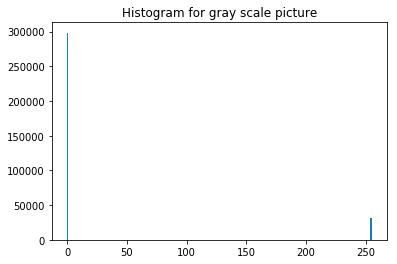

Enter 6 to select 26_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


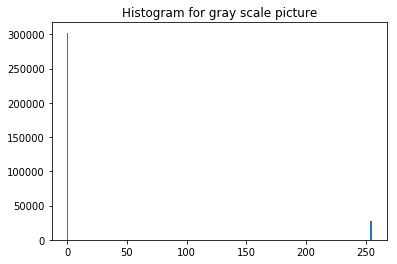

Enter 7 to select 27_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


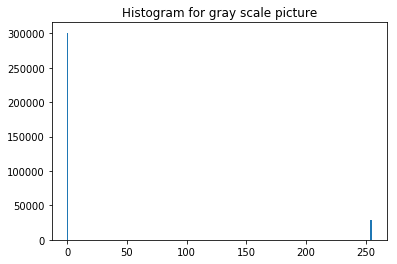

Enter 8 to select 28_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


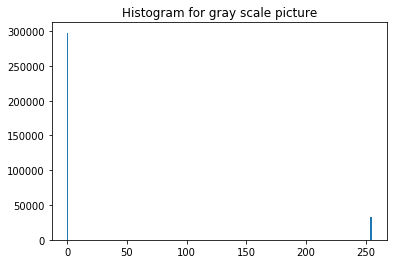

Enter 9 to select 29_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


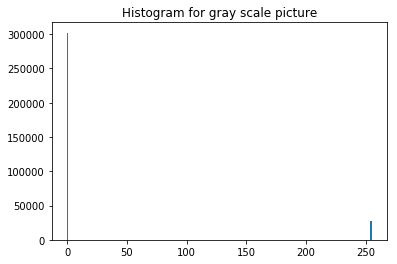

Enter 10 to select 30_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


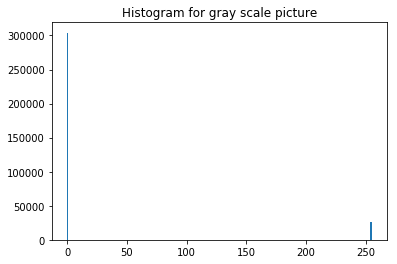

Enter 11 to select 31_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


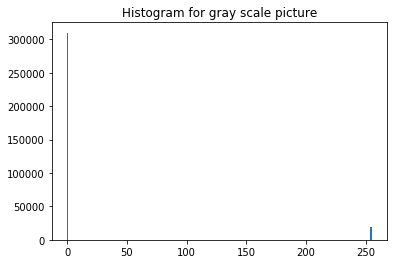

Enter 12 to select 32_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


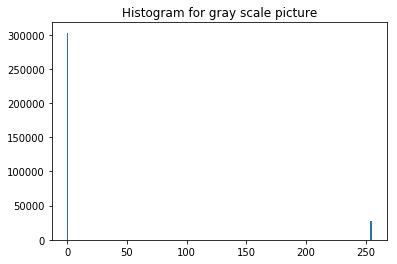

Enter 13 to select 33_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


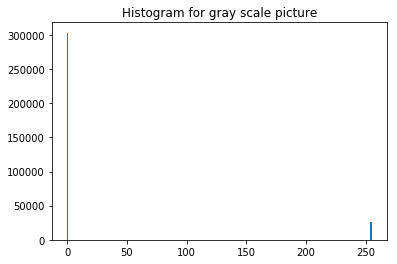

Enter 14 to select 34_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


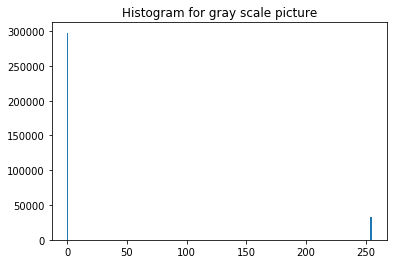

Enter 15 to select 35_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


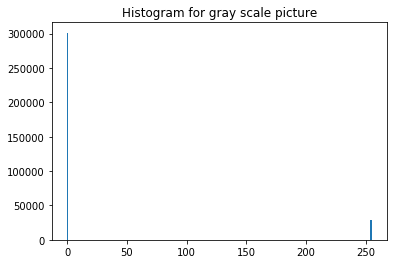

Enter 16 to select 36_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


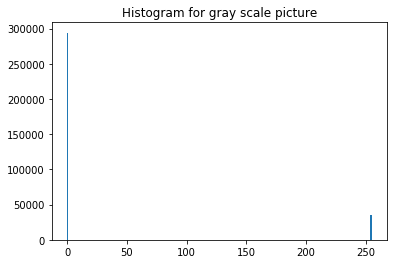

Enter 17 to select 37_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


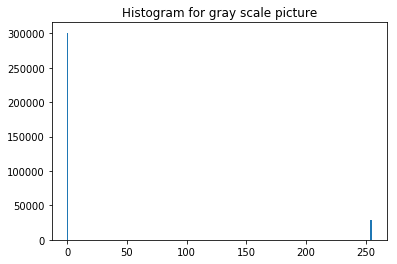

Enter 18 to select 38_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


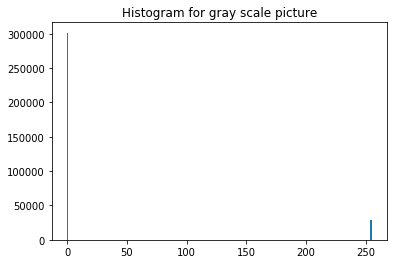

Enter 19 to select 39_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


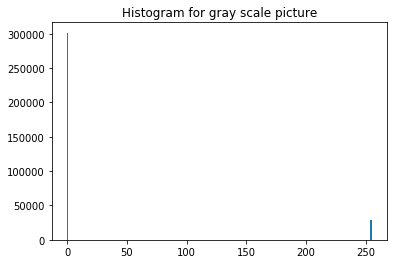

Enter 20 to select 40_manual1.gif
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255


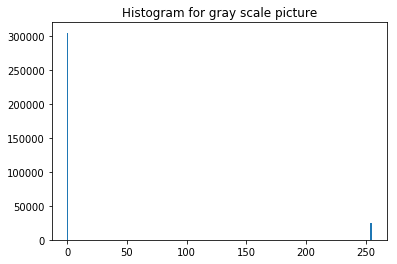

In [7]:
path_ground_truth = './conj_train/ground_truth/'

path_retina_gt = './DRIVE/DRIVE/training/1st_manual/'

for count, filename in enumerate(sorted(os.listdir(path_retina_gt)), start=1):
    print('Enter {} to select {}'.format(count, filename))
    
    tempImg = Image.open(path_retina_gt + filename)
    tempImg = np.asarray(tempImg)
    #tempImg = cv2.imread(path_retina_gt + filename,0)
    #print(tempImg)
    #print(np.max(tempImg))
    show_histogram(tempImg,'gray','float')

# => 0 or 256
    



Enter 1 to select train_conj_01.png
(1000, 1300)


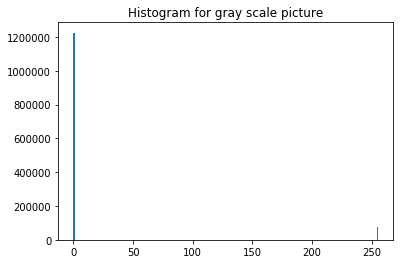

Enter 2 to select train_conj_02.png
(800, 1400)


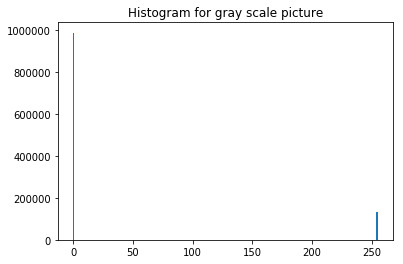

Enter 3 to select train_conj_03.png
(380, 700)


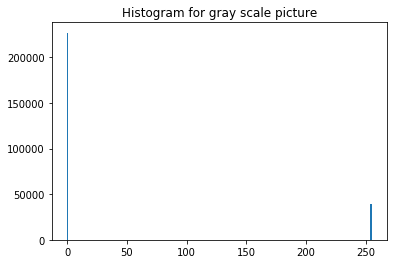

Enter 4 to select train_conj_04.png
(650, 1200)


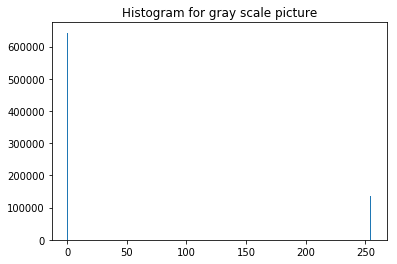

Enter 5 to select train_conj_05.png
(870, 463)


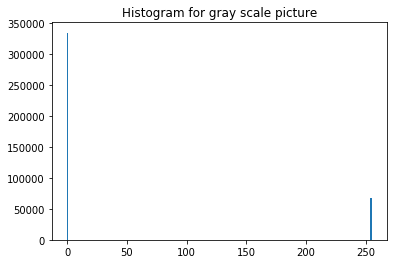

Enter 6 to select train_conj_06.png
(750, 1300)


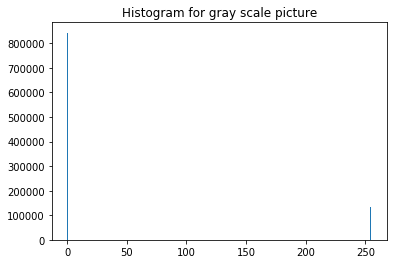

In [17]:
path_ground_truth = './conj_train/ground_truth/'

path_retina_gt = './DRIVE/DRIVE/training/1st_manual/'

for count, filename in enumerate(sorted(os.listdir(path_ground_truth)), start=1):
    print('Enter {} to select {}'.format(count, filename))
    
    
    tempImg = cv2.imread(path_ground_truth + filename,0)
    
    print(np.shape(tempImg))
    show_histogram(tempImg,'gray','float')


    



Enter 1 to select train_conj_01.png
0


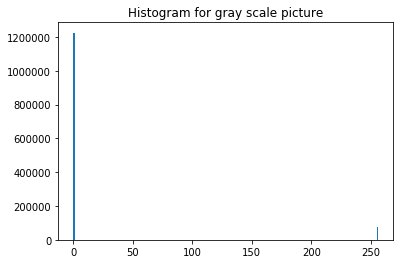

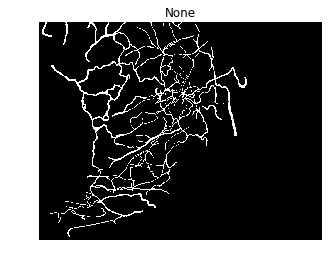

Enter 2 to select train_conj_02.png
0


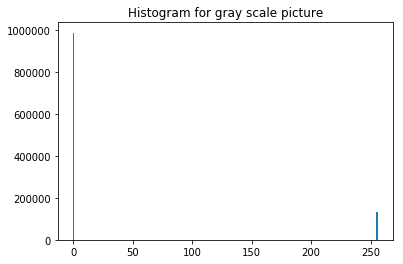

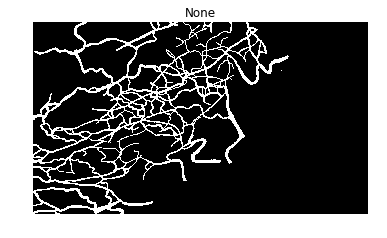

Enter 3 to select train_conj_03.png
0


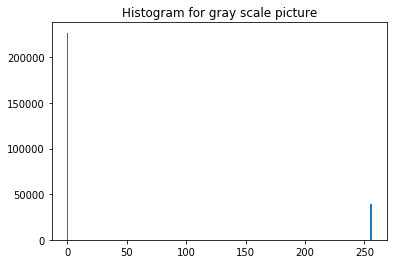

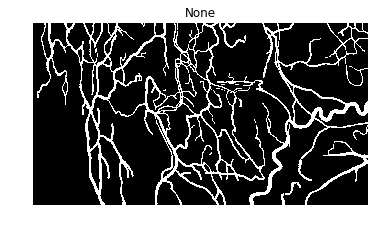

Enter 4 to select train_conj_04.png
0


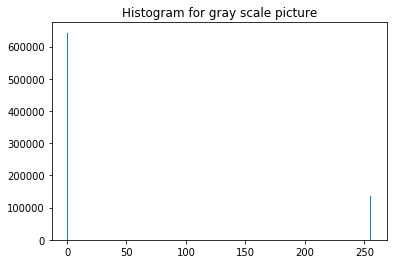

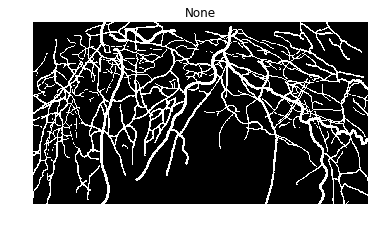

Enter 5 to select train_conj_05.png
0


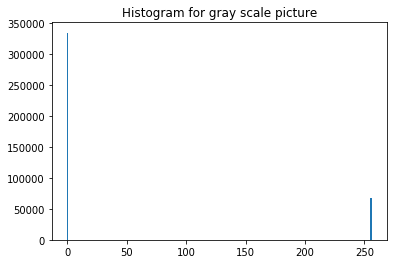

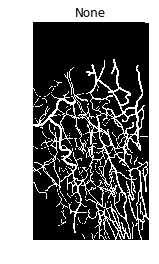

Enter 6 to select train_conj_06.png
0


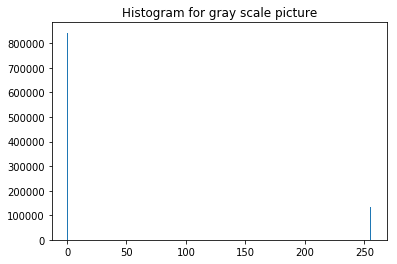

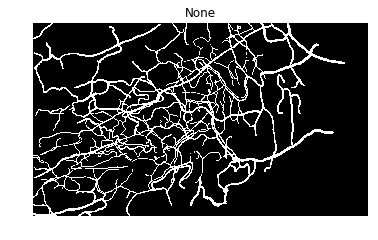

In [16]:
path_ground_truth = './conj_train/ground_truth/'

path_retina_gt = './DRIVE/DRIVE/training/1st_manual/'

for count, filename in enumerate(sorted(os.listdir(path_ground_truth)), start=1):
    print('Enter {} to select {}'.format(count, filename))
    
    
    tempImg = cv2.imread(path_ground_truth + filename,0)
    resultImg = tempImg
    resultImg[tempImg > 10] = 255
    resultImg[tempImg <= 10] = 0
    
    print(np.min(tempImg))

    show_histogram(resultImg,'gray')
    show_on_jupyter(resultImg,'gray')
    
    cv2.imwrite(path_ground_truth + filename, resultImg)